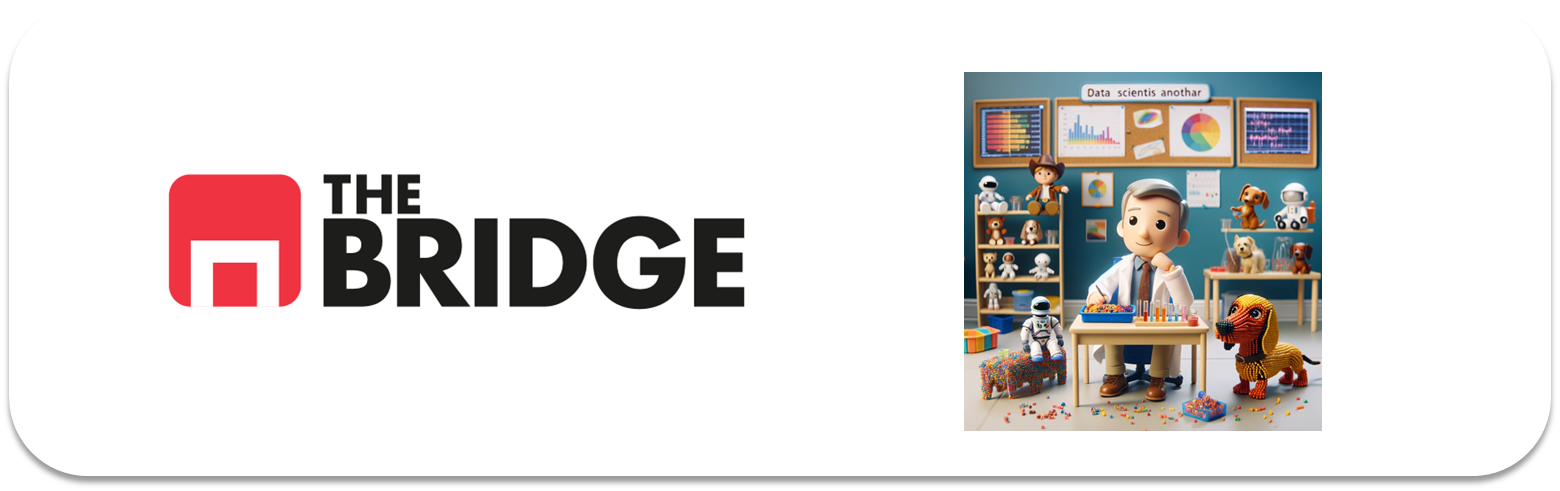

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [64]:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from bootcampviztools import *



### #1 Preparación


In [65]:

def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):
    # Primera parte: Preparo el dataset con cardinalidades, % variación cardinalidad, y tipos
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]) # Cardinaliad y porcentaje de variación de cardinalidad
    df_temp = df_temp.T # Como nos da los valores de las columnas en columnas, y quiero que estas sean filas, la traspongo
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"}) # Cambio el nombre de la transposición anterior para que tengan más sentido, y uso asignación en vez de inplace = True (esto es arbitrario para el tamaño de este dataset)

    # Corrección para cuando solo tengo un valor
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

    # Creo la columna de sugerenica de tipo de variable, empiezo considerando todas categóricas pero podría haber empezado por cualquiera, siempre que adapte los filtros siguientes de forma correspondiente
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"
    # Ojo los filtros aplicados cumplen con el enunciado pero no siguen su orden y planteamiento

    return df_temp


In [66]:
def frecuencias(df, columna_categorica, porcentaje = True):
    frec_abs = df[columna_categorica].value_counts() # Values_counts() me da las frecuencias absolutas
    frec_rel = df[columna_categorica].value_counts(normalize=True) * (100 if porcentaje else 1)  # Si activo el argumento normalize me da las relativas en tanto por 1, el argumento porcentaje de la función me permite pasarlo a tanto por cien

    # Crear DataFrame con ambas frecuencias
    frec_df = pd.DataFrame({'Frecuencia Absoluta': frec_abs, 'Frecuencia Relativa': frec_rel})

    return frec_df

In [67]:
def get_CV(df, columna):
    columna = [columna] if type(columna) == str else columna
    return df[columna].describe().T["std"]/df[columna].describe().T["mean"] * 100

### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [68]:
df = sns.get_dataset_names()

In [69]:
df

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [70]:
df_titanic = sns.load_dataset('titanic')

### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [71]:
df_titanic.head(30)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [72]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [73]:
df_titanic.isna().mean()*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [74]:
df_titanic= df_titanic.drop('parch',axis=1)

In [75]:
df_titanic['who'].value_counts(normalize=True)

who
man      0.602694
woman    0.304153
child    0.093154
Name: proportion, dtype: float64

In [76]:
df_titanic.groupby('who')['age'].mean()

who
child     6.369518
man      33.173123
woman    32.000000
Name: age, dtype: float64

In [77]:
#df_titanic['age_by_group']=df_titanic.groupby('who')['age'].transform('mean')

In [78]:
df_titanic = df_titanic[df_titanic.age.isna()==False]
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     714 non-null    int64   
 1   pclass       714 non-null    int64   
 2   sex          714 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        714 non-null    int64   
 5   fare         714 non-null    float64 
 6   embarked     712 non-null    object  
 7   class        714 non-null    category
 8   who          714 non-null    object  
 9   adult_male   714 non-null    bool    
 10  deck         184 non-null    category
 11  embark_town  712 non-null    object  
 12  alive        714 non-null    object  
 13  alone        714 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(3), object(5)
memory usage: 64.6+ KB


In [79]:
df_titanic.head(20)

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
6,0,1,male,54.0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4.0,1,16.7000,S,Third,child,False,G,Southampton,yes,False


In [80]:
#df_titanic.loc[df_titanic['age'].isna(),'age']=df_titanic.loc[df_titanic['age'].isna(),'age_by_group']

In [81]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     714 non-null    int64   
 1   pclass       714 non-null    int64   
 2   sex          714 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        714 non-null    int64   
 5   fare         714 non-null    float64 
 6   embarked     712 non-null    object  
 7   class        714 non-null    category
 8   who          714 non-null    object  
 9   adult_male   714 non-null    bool    
 10  deck         184 non-null    category
 11  embark_town  712 non-null    object  
 12  alive        714 non-null    object  
 13  alone        714 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(3), object(5)
memory usage: 64.6+ KB


In [82]:
df_titanic['embark_town'].mode().iloc[0]

'Southampton'

In [83]:
df_titanic.loc[df_titanic['embark_town'].isna(),'embark_town']=df_titanic['embark_town'].mode().iloc[0]

In [84]:
df_titanic['embarked']=df_titanic['embark_town']

In [85]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     714 non-null    int64   
 1   pclass       714 non-null    int64   
 2   sex          714 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        714 non-null    int64   
 5   fare         714 non-null    float64 
 6   embarked     714 non-null    object  
 7   class        714 non-null    category
 8   who          714 non-null    object  
 9   adult_male   714 non-null    bool    
 10  deck         184 non-null    category
 11  embark_town  714 non-null    object  
 12  alive        714 non-null    object  
 13  alone        714 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(3), object(5)
memory usage: 64.6+ KB


In [86]:
#df_titanic = df_titanic.drop(['deck','age_by_group'],axis=1)

In [87]:
df_titanic = df_titanic.drop('embark_town',axis=1)

### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.


In [88]:
card_tipo(df_titanic)

,Card,%_Card,Tipo,tipo_sugerido
survived,2,0.280112,int64,Binaria
pclass,3,0.420168,int64,Categorica
sex,2,0.280112,object,Binaria
age,88,12.32493,float64,Numerica discreta
sibsp,6,0.840336,int64,Categorica
fare,220,30.812325,float64,Numerica continua
embarked,3,0.420168,object,Categorica
class,3,0.420168,category,Categorica
who,3,0.420168,object,Categorica
adult_male,2,0.280112,bool,Binaria




| Columna/Variable | Descripción |
| ---------------- | ----------- |
| survived         | Indica si el pasajero sobrevivió (1) o no (0) |
| pclass           | Clase del pasaje (1ª, 2ª, 3ª) |
| sex              | Género del pasajero |
| age              | Edad del pasajero |
| sibsp            | Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros) |
| parch            | Número de padres/hijos a bordo |
| fare             | Tarifa pagada por el pasajero |
| embarked         | Es la incial de la letra de la ciudad donde embarcó la persona.(C = Cherbourg; Q = Queenstown; S = Southampton) |
| class            | Clase del pasaje como categoría (Primera, Segunda, Tercera) |
| who              | Categoría del pasajero (hombre, mujer, niño) |
| adult_male       | Booleano que indica si el pasajero es un hombre adulto |
| deck             | Cubierta del barco donde se ubicaba el pasajero |
| embark_town      | Ciudad de embarque: Cherbourg; Queenstown; Southampton)  |
| alive            | Indica si el pasajero está vivo ('yes') o muerto ('no') |
| alone            | Booleano que indica si el pasajero viajaba solo |



| Columna/Variable | Descripción |
| ---------------- | ----------- |
| -       | - |



### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [89]:
frecuencias(df_titanic,"embarked")

,Frecuencia Absoluta,Frecuencia Relativa
embarked,,
Southampton,556,77.871148
Cherbourg,130,18.207283
Queenstown,28,3.921569


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

### #2.1 Categóricas

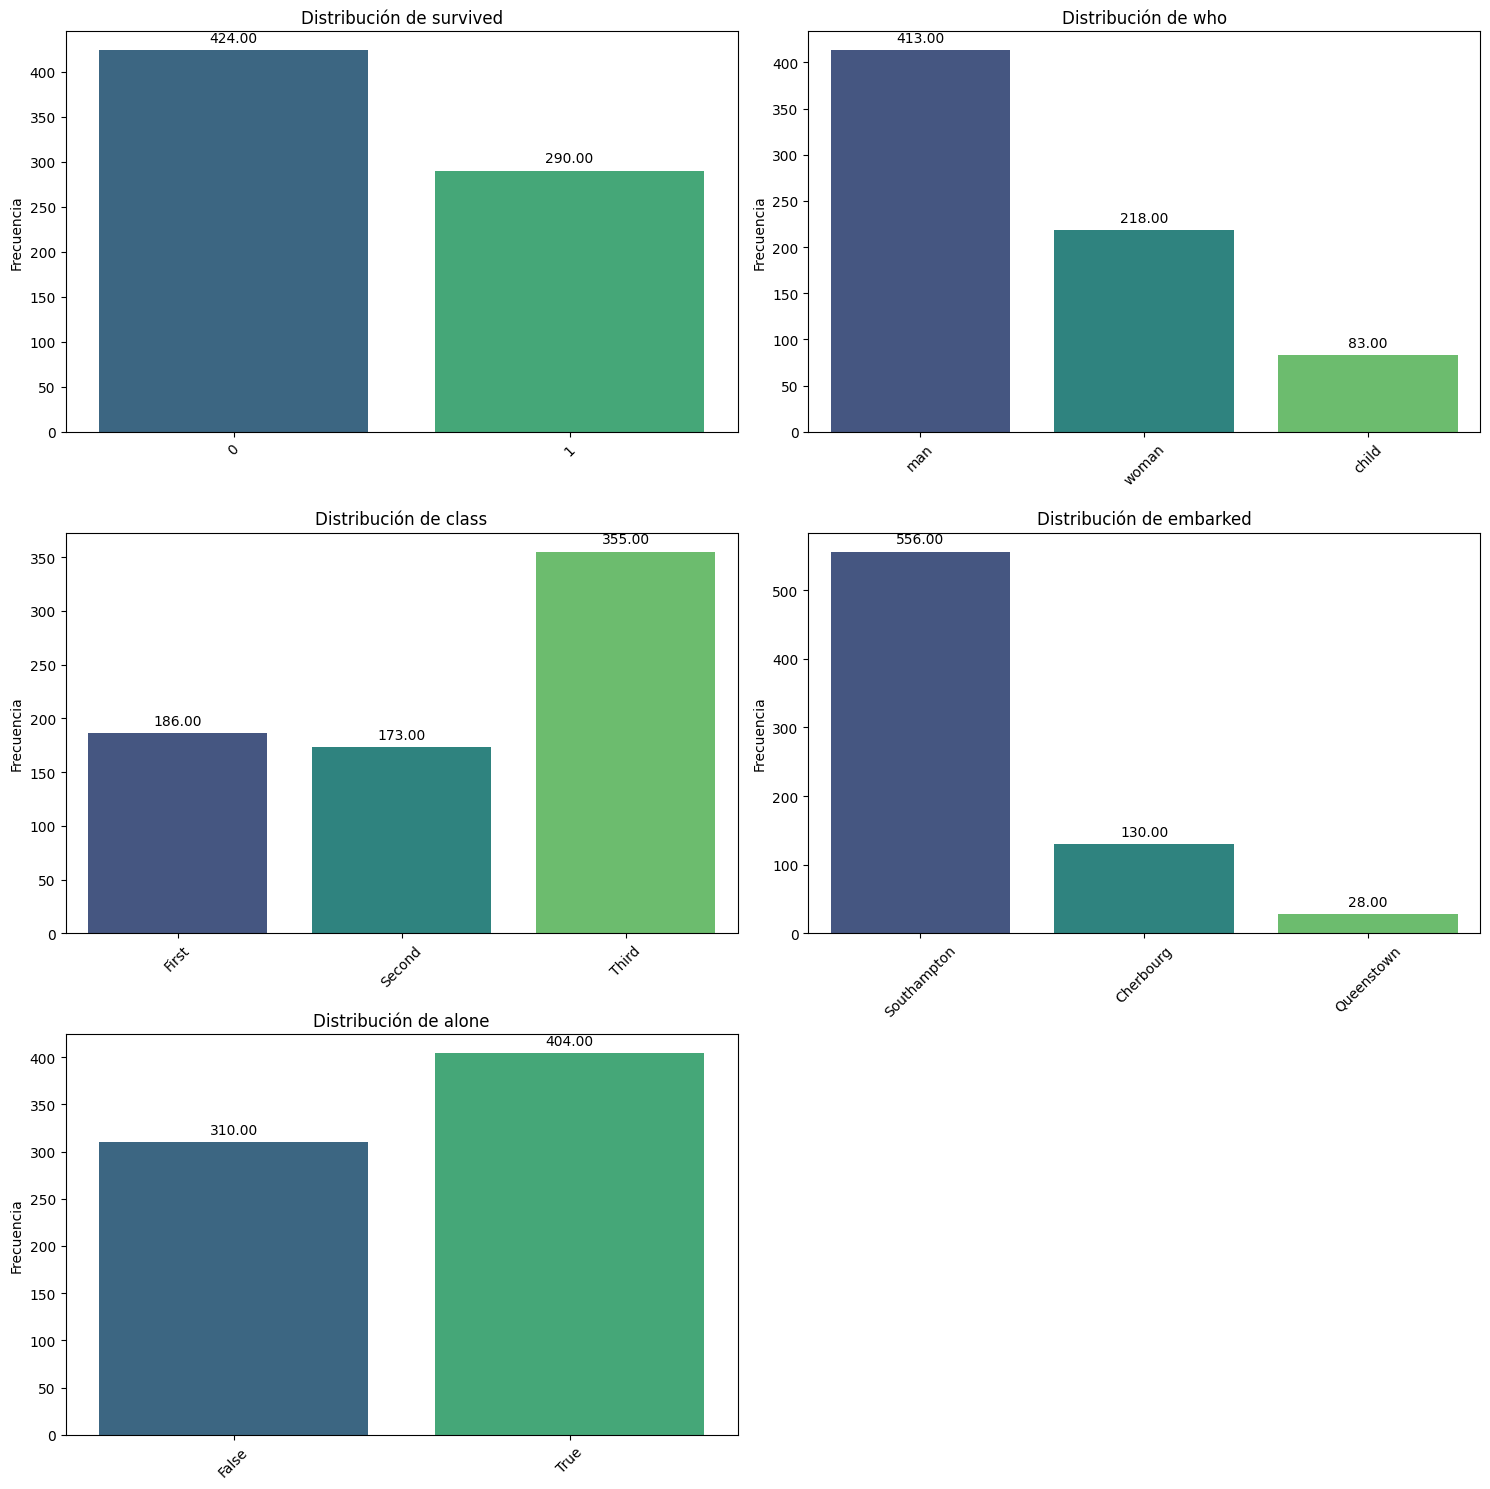

In [90]:
pinta_distribucion_categoricas(df_titanic,["survived","who","class","embarked","alone"],mostrar_valores=True)

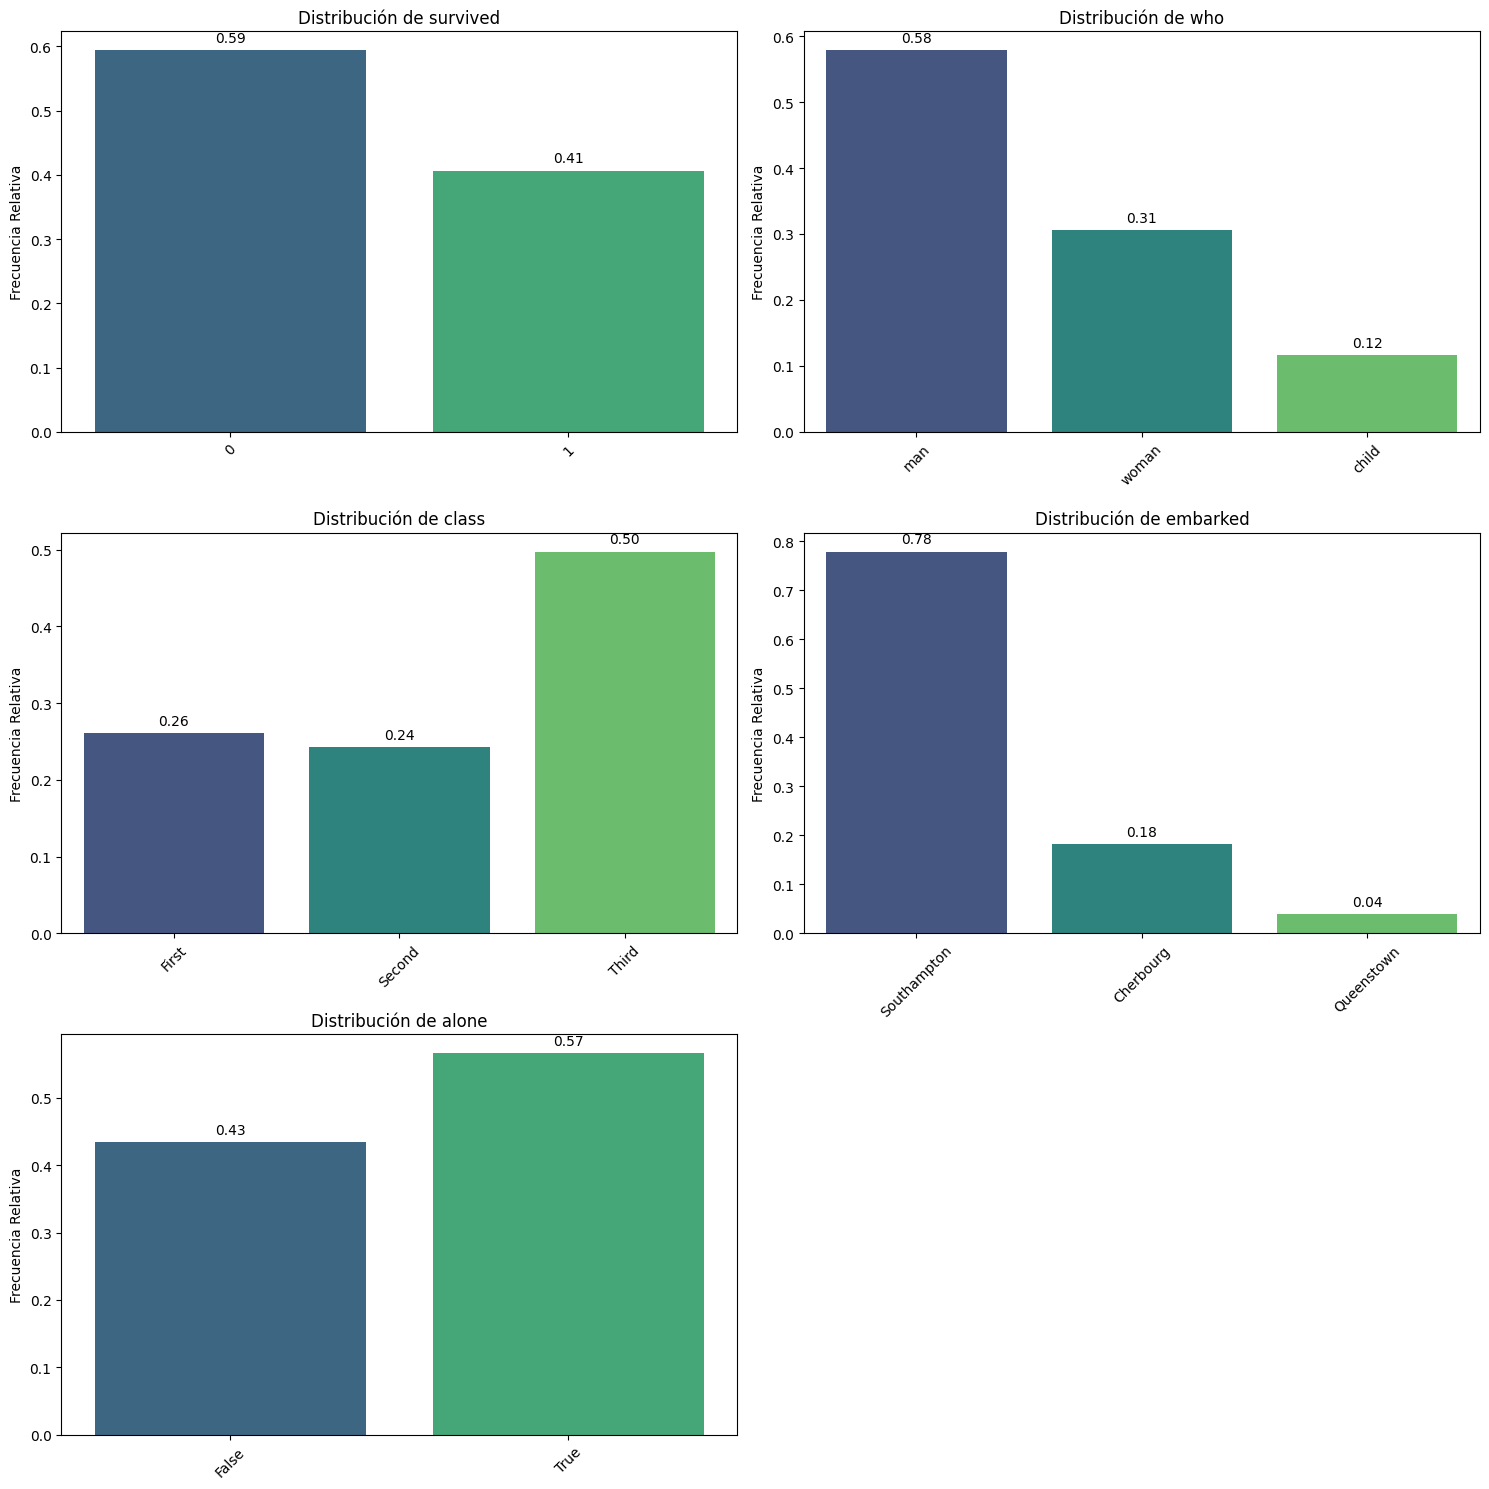

In [91]:
pinta_distribucion_categoricas(df_titanic,["survived","who","class","embarked","alone"],mostrar_valores=True,relativa=True)

In [92]:
print(df_titanic[df_titanic['who']=='man'].age.min())
print(df_titanic[df_titanic['who']=='woman'].age.min())
print(df_titanic[df_titanic['who']=='child'].age.max())

16.0
16.0
15.0


***survived***:
- Según estos valores el ratio de supervivencia fue casi la mitad que el de mortalidad (38% a 62%). 

***who***
- Esta variable muestra la distinción entre adultos (mujeres y hombres) y niños. Bi-variante con survived y comprobar 38-62 por grupos.

***class***
- Había mucho más pasaje de tercera (55%) que de segunda (21%) y de primera (24%). Curiosamente había más de primera que de segunda. Bi-variante con survived.

***embarked***
- Embarcaron principamente en Southampton (72%), un cierto número en Cherboroug (19%) y ya menos en Queenstown (9%).

***alone***
- Según esta variable eran más los pasajeros que viajaban sólos (60%) que los que no (40%). Análisis bi-variante con survived.

***sex***
- Viajaron más hombres que mujeres (65%-35%). Bi-variante con survived.

### #2.2 Numéricas

In [93]:
df_titanic[["age","fare"]].describe()

,age,fare
count,714.000000,714.000000
mean,29.699118,34.694514
std,14.526497,52.918930
min,0.420000,0.000000
25%,20.125000,8.050000
50%,28.000000,15.741700
75%,38.000000,33.375000
max,80.000000,512.329200


In [94]:
get_CV(df_titanic,'age')

age    48.912219
dtype: float64

In [95]:
get_CV(df_titanic,'fare')

fare    152.528234
dtype: float64

(2, 2)


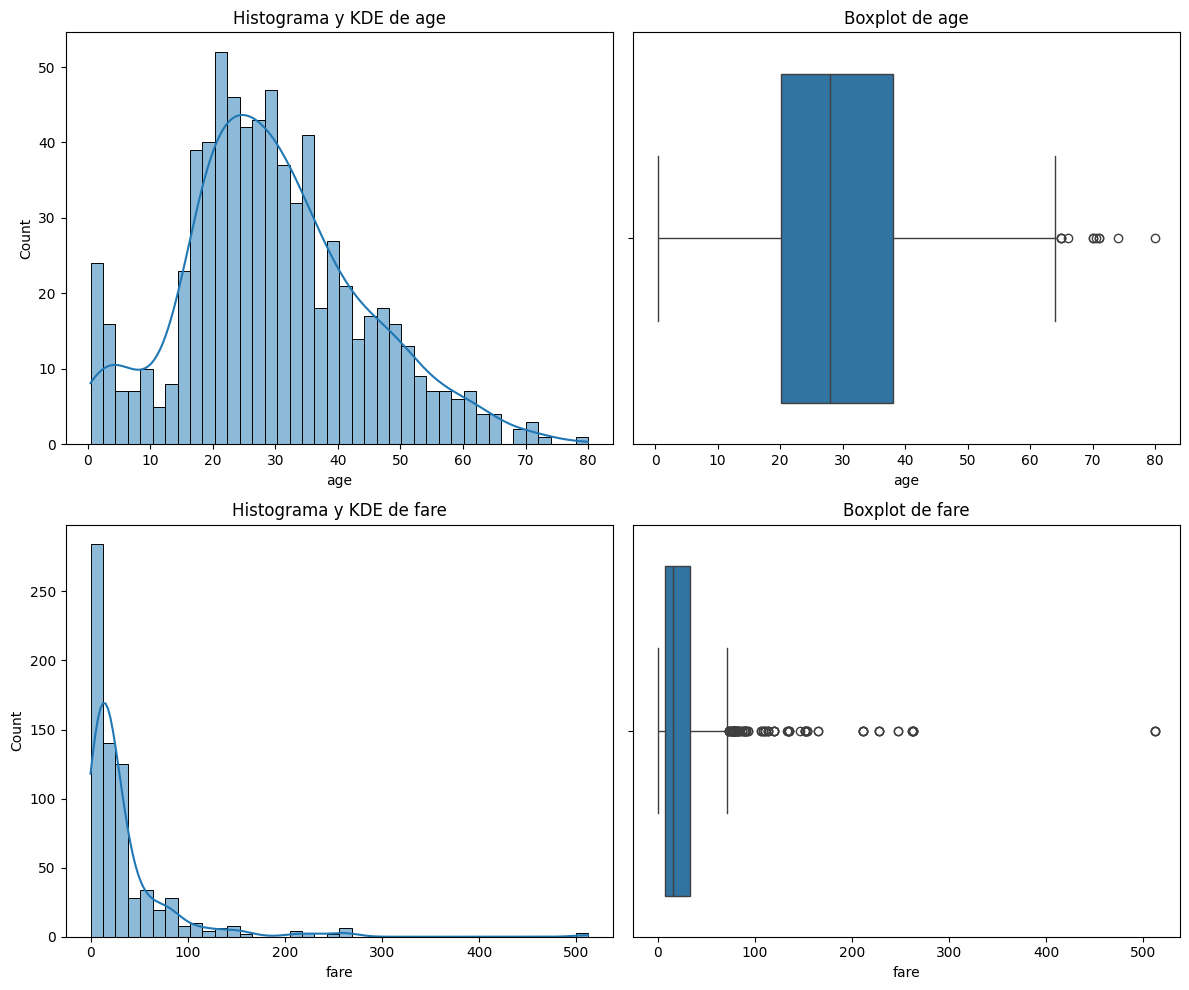

In [96]:
plot_combined_graphs(df_titanic,["age","fare"],bins=40)

***age***:
- Presenta una bonita gráfica casi-normal, que habla de simetría, buena representación por las tendencias centrales, aunque haya cierta dispersión (CV > 30%). 
- Presenta posibles outliers por encima y por debajo (pero en este caso serán los bebés y los adultos mayores). 
- Por apuntar valores (media: 32, mediana: 30). 
- En general "age" se presta interesante  para entender mejor el pasaje y luego relacionarlo multivariantemente con "survived"

**fare**:
- El precio del ticket presenta una curva de distribución completamente diferente.
- Es una distribución con concentración (el tamaño de la caja es reducido) y larga cola (como se puede ver en la existencia de bastantes valores que podrían ser considerados outliers). 
- La media parece poco representativa y optaríamos por la mediana como un valor más representativo (de 32 a 14 libras) pero sin duda será interesante 
- Quizá tratar esta variable a haciendo *binnig* o relacionarla con class, y así nos ahorra la necesidad incluso de usar esta columna.